In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import scipy
import nltk
from scipy.sparse import coo_matrix, hstack
from nltk.stem.snowball import SnowballStemmer

In [10]:
train = pd.read_csv('G:/Downloads/crowdflower-search-relevance/train.csv/train.csv')
test = pd.read_csv('G:/Downloads/crowdflower-search-relevance/test.csv/test.csv')
sample = pd.read_csv('G:/Downloads/crowdflower-search-relevance/sampleSubmission.csv/sampleSubmission.csv')

In [11]:
data = pd.concat([train, test])

In [12]:
data['product_description'].fillna('0', inplace=True)

In [13]:
df = data[data['query']=='bridal shower decorations']

In [15]:
df['query'] = df['query'].str.lower()
df['product_title'] = df['product_title'].str.lower()
df['product_description'] = df['product_description'].str.lower()

C:\Users\Dindar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dindar\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dindar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [16]:
df

,id,query,product_title,product_description,median_relevance,relevance_variance
0,1,bridal shower decorations,accent pillow with heart design - red/black,red satin accent pillow embroidered with a hea...,1.0,0.000
797,2592,bridal shower decorations,personalized bridal shower banner 36,hang our personalized bridal shower banner to ...,4.0,0.943
938,3029,bridal shower decorations,hers accent pillow - white,0,1.0,0.000
1234,3989,bridal shower decorations,ddi 1122249 bridal shower party 192 piece ship...,bridal shower party decor - 192 piece shipper ...,1.0,0.471
1478,4786,bridal shower decorations,"bride to be"" floral banner - coral""","details\nuse as a photo prop or deocration, wh...",2.0,1.020
...,...,...,...,...,...,...
20368,29565,bridal shower decorations,bridal shower personalized photo banner 24,celebrate a bridal shower with our bridal show...,NaN,NaN
20479,29726,bridal shower decorations,tissue paper garland 9'-white,darice-victoria lynn: bridal paper heart garla...,NaN,NaN
20991,30464,bridal shower decorations,pink bag of rose petals,this 9 inch by 9 inch bag of rose petals is a ...,NaN,NaN
21824,31676,bridal shower decorations,party deco 04507 18 ft. black star wire garlan...,"party deco is your complete source for luau, b...",NaN,NaN


In [25]:
df['tokens'] = df['product_description'].str.split()

C:\Users\Dindar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
import gensim

word2vec_path = "G:/Downloads/GoogleNews-vectors-negative300.bin.gz"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [26]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [40]:
embeddings = get_word2vec_embeddings(word2vec, df[:43])

In [41]:
len(embeddings)

43

In [42]:
ts = df['median_relevance'][:43]

In [34]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches

In [43]:
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(embeddings)

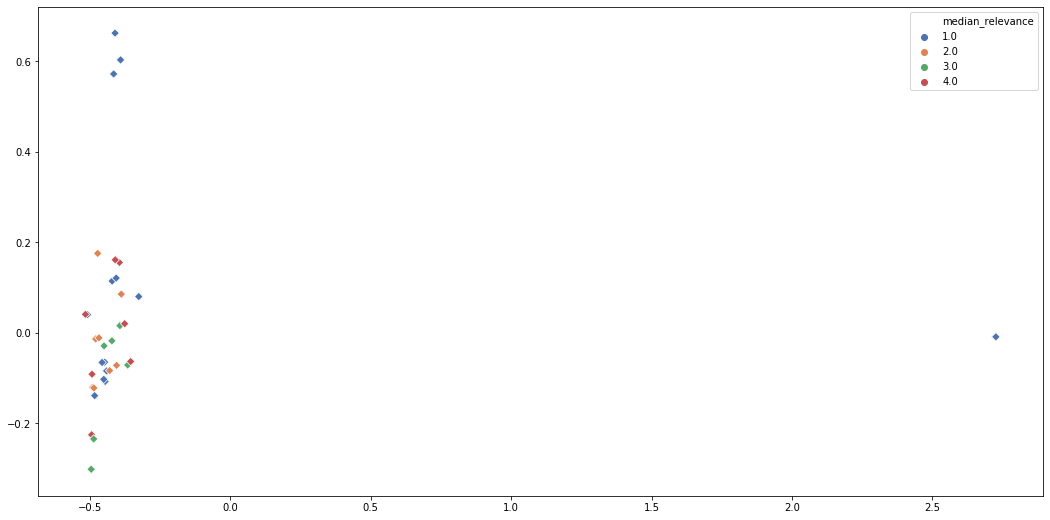

In [44]:
plt.figure(figsize=(18, 9))
sns.scatterplot(X_reduced[:,0], X_reduced[:,1], hue=ts, marker='D',palette='deep')

In [45]:
svd = TruncatedSVD(n_components=2, random_state=42)
X_reduced1 = svd.fit_transform(embeddings)

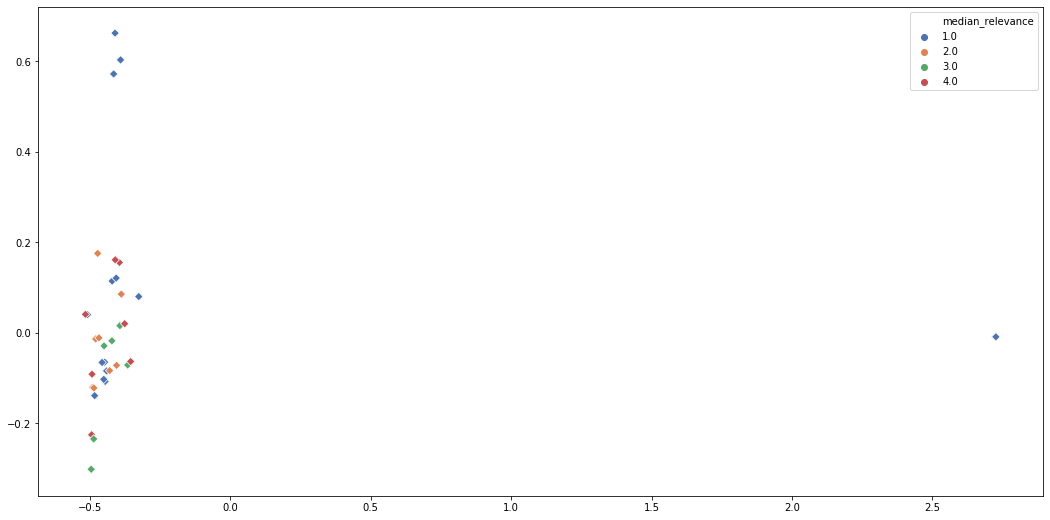

In [46]:
plt.figure(figsize=(18, 9))
sns.scatterplot(X_reduced1[:,0], X_reduced1[:,1], hue=ts, marker='D',palette='deep')

In [48]:
from sklearn.model_selection import LeaveOneOut
from xgboost import XGBClassifier
from sklearn.metrics import cohen_kappa_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LinearRegression
loo = LeaveOneOut()

In [60]:
npa = np.asarray(embeddings)

In [62]:
%%time
y_ts = []
y_pr = []
for train_index, test_index in loo.split(npa):
    X_train, X_test = npa[train_index], npa[test_index]
    y_train, y_test = ts.values[train_index], ts.values[test_index]
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    y_preds = xgb.predict(X_test)
    y_ts.append(y_test)
    y_pr.append(y_preds)

Wall time: 7.81 s


In [56]:
iii = []
for i in y_pr:
    iii.append(i.flatten())

In [63]:
cohen_kappa_score(y_ts, y_pr,weights='quadratic')

0.32426216941356845